<a href="https://colab.research.google.com/github/DJ1070/NLP/blob/main/nlp_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer 
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
#import matplotlib.cm as cm
#from matplotlib import rcParams
from collections import Counter
#from nltk.tokenize import RegexpTokenizer
import re
import string
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [ ]:
import io
from google.colab import files
uploaded = files.upload()

Saving cleaned_tweets-half.csv to cleaned_tweets-half.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['cleaned_tweets-half.csv']), sep = ";")

In [ ]:
#df = pd.read_csv('https://drive.google.com/file/d/1tz2bsLEkR1E7MlANJljNtWuw8v-43bYr/view?usp=sharing/cleaned_tweets-half.csv', sep = ';')

In [ ]:
df = df.drop('Unnamed: 0', axis = 1)  

In [ ]:
df

,label,text
0,0,awww that's bummer shoulda got david carr thir...
1,0,dived many times ball managed save % rest go b...
2,0,behaving i'm mad can't see
3,0,need hug
4,0,k nope
...,...,...
799995,1,wooooo xbox back
799996,1,recovering long weekend
799997,1,forster yeah work better waiting end wonder ti...
799998,1,thewdb com cool hear old walt interviews ♫ ~bmta


In [ ]:
def cleaning_rest(df):
    return re.sub("[^a-z'A-Z]", " ", df)

df['text'] = df['text'].apply(lambda x: cleaning_rest(str(x)))
df['text'].head()

0    awww that's bummer shoulda got david carr thir...
1    dived many times ball managed save   rest go b...
2                           behaving i'm mad can't see
3                                             need hug
4                                               k nope
Name: text, dtype: object

In [ ]:
# for irow, row in df.iterrows():
#   if row['label'] == 0: status = True
#   elif row['label'] == 1: status = False
#   print('For text:' ,row['text'], '|| The negativity status is: ', status)
#   if irow == 20: break

In [ ]:
vocab_size = 20000
embedding_dim = 16
max_length = 16
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

label    0
text     0
dtype: int64

In [ ]:
df.shape

(800000, 2)

In [ ]:
tweets = df['text'].to_list()
labels = df['label'].to_list()

In [ ]:
df['text']

0         awww that's bummer shoulda got david carr thir...
1         dived many times ball managed save   rest go b...
2                                behaving i'm mad can't see
3                                                  need hug
4                                                    k nope
                                ...                        
799995                                     wooooo xbox back
799996                              recovering long weekend
799997    forster yeah work better waiting end wonder ti...
799998     thewdb com cool hear old walt interviews    bmta
799999    happy th birthday boo alll time tupac amaru sh...
Name: text, Length: 800000, dtype: object

In [ ]:
training_tweets, testing_tweets, training_labels, testing_labels = train_test_split(tweets, labels, test_size = .3, random_state = 3) 

In [ ]:
make_tokens = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
make_tokens.fit_on_texts(training_tweets)

In [ ]:
word_dict = make_tokens.word_index

training_sequences = make_tokens.texts_to_sequences(training_tweets)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = make_tokens.texts_to_sequences(testing_tweets)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
#testing_padded[0:5]
len(word_dict)
#word_dict

156535

In [ ]:
training_padded[-10:]

array([[   15,    67,    36,     5,  1462,    28,  3311,     0,     0,
            0,     0,     0,     0,     0,     0,     0],
       [ 6070, 10479,  2499,   508, 10816,   103,   584,    80,  1075,
            0,     0,     0,     0,     0,     0,     0],
       [  244,     1,    29,     7,  4930,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],
       [  112,     4,    26,   165,     1,   175,    60,   126,   269,
            0,     0,     0,     0,     0,     0,     0],
       [  321,    24,    49,   985,  4222,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],
       [  427,     6,    42,  1759,   652,  2397,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],
       [ 2222,    99,    19,   162,  6528, 12832,    99,     0,     0,
            0,     0,     0,     0,     0,     0,     0],
       [  744, 12779,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     

In [ ]:
word_dict

{'<OOV>': 1,
 "i'm": 2,
 'good': 3,
 'day': 4,
 'get': 5,
 'like': 6,
 'go': 7,
 'quot': 8,
 'today': 9,
 'going': 10,
 'work': 11,
 'love': 12,
 'got': 13,
 'lol': 14,
 'time': 15,
 'back': 16,
 'u': 17,
 'one': 18,
 'know': 19,
 'im': 20,
 'really': 21,
 'amp': 22,
 'see': 23,
 "can't": 24,
 'still': 25,
 'well': 26,
 'new': 27,
 'night': 28,
 'want': 29,
 'think': 30,
 'home': 31,
 'thanks': 32,
 'oh': 33,
 'much': 34,
 'miss': 35,
 'need': 36,
 'last': 37,
 'hope': 38,
 'great': 39,
 'tomorrow': 40,
 'morning': 41,
 'twitter': 42,
 'haha': 43,
 'feel': 44,
 'sad': 45,
 'fun': 46,
 'wish': 47,
 'right': 48,
 'sleep': 49,
 'bad': 50,
 'happy': 51,
 'sorry': 52,
 'would': 53,
 'tonight': 54,
 "i'll": 55,
 'make': 56,
 'come': 57,
 'getting': 58,
 'way': 59,
 'though': 60,
 'nice': 61,
 'gonna': 62,
 'better': 63,
 'watching': 64,
 'yeah': 65,
 'wait': 66,
 'bed': 67,
 "that's": 68,
 'could': 69,
 'week': 70,
 'school': 71,
 'people': 72,
 "i've": 73,
 'days': 74,
 'hate': 75,
 'even':

In [ ]:
testing_padded[20000]

array([   77,    62,  8212,   157, 14550,     1,   208,    80,    15,
           0,     0,     0,     0,     0,     0,     0], dtype=int32)

**Decode the encoded sentences**

In [ ]:
reverse_word_dict = dict([(value, key) for (key, value) in word_dict.items()])

def decode_review(text):
    return ' '.join([reverse_word_dict.get(i, '?') for i in text])

decode_review(testing_sequences[2000])

'mcfox'

**Layer Definition**

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(24, activation= 'relu'),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 16, 16)            320000    
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                12544     
_________________________________________________________________
dense (Dense)                (None, 24)                1560      
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 24)                600       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 2

In [ ]:
num_epochs = 5
training_labels = np.array(training_labels)
testing_labels  = np.array(testing_labels)
training_padded = np.array(training_padded)
testing_padded = np.array(testing_padded)

history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=1)

Epoch 1/5
17500/17500 [==============================] - 208s 10ms/step - loss: 0.5090 - accuracy: 0.7468 - val_loss: 0.4566 - val_accuracy: 0.7848
Epoch 2/5
17500/17500 [==============================] - 175s 10ms/step - loss: 0.4399 - accuracy: 0.7947 - val_loss: 0.4524 - val_accuracy: 0.7874
Epoch 3/5
17500/17500 [==============================] - 174s 10ms/step - loss: 0.4205 - accuracy: 0.8056 - val_loss: 0.4505 - val_accuracy: 0.7866
Epoch 4/5
17500/17500 [==============================] - 173s 10ms/step - loss: 0.4015 - accuracy: 0.8162 - val_loss: 0.4553 - val_accuracy: 0.7848
Epoch 5/5
17500/17500 [==============================] - 173s 10ms/step - loss: 0.3854 - accuracy: 0.8252 - val_loss: 0.4654 - val_accuracy: 0.7822


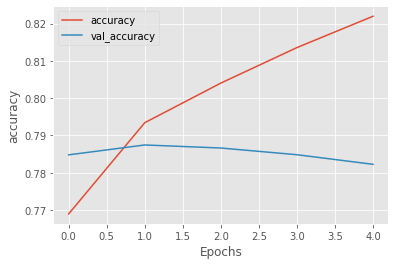

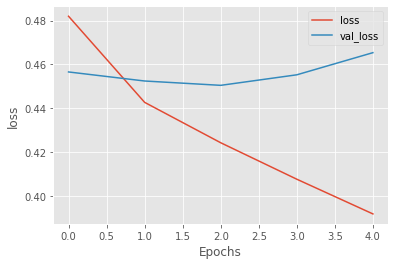

In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [ ]:
pred = model.predict(testing_padded)
pred[0:10]

array([[0.8032519 ],
       [0.9474561 ],
       [0.15674245],
       [0.5553319 ],
       [0.61309075],
       [0.34055877],
       [0.9031741 ],
       [0.0076293 ],
       [0.9148342 ],
       [0.09085728]], dtype=float32)

In [ ]:
tf.greater(pred, .5)[0:5]

<tf.Tensor: shape=(5, 1), dtype=bool, numpy=
array([[ True],
       [ True],
       [False],
       [ True],
       [ True]])>

In [ ]:
testing_padded[10]

array([   1, 2120,    1,    1,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0], dtype=int32)

In [ ]:
reverse_word_dict = dict([(value, key) for (key, value) in word_dict.items()])

def decode_review(text):
    return ' '.join([reverse_word_dict.get(i, '?') for i in text])

decode_review(testing_padded[0])

'oh yeah send video ? ? ? ? ? ? ? ? ? ? ? ?'

In [ ]:
decode_review(testing_padded[100230])

'xd youre lucky got album still cant find hmv ? ? ? ? ? ? ?'